In [1]:
### Target Outcome Fund Aims to achieve return profile with certainty
## It is also known as Defined Outcome

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pricing

In [2]:
BASE_DIR = 'C:\work\Defined_Outcome_Investment'
data_dir =  os.path.join(BASE_DIR , 'Data')

In [3]:
risk_free_historical = pd.read_csv(os.path.join(data_dir,'DTB3.csv'))
dividend_yield_historical = pd.read_csv(os.path.join(data_dir,'MULTPL-SP500_DIV_YIELD_MONTH.csv'))

In [4]:
# option_type, position, time_to_maturity, spot_price, strike_price, risk_free, 'dividend_yield', 'implied_vol'
aa = pricing.option_pricing(option_type='call', position = 'long', time_to_maturity=1, spot_price=421, strike_price=400, risk_free=0.0165, dividend_yield=0.02, implied_vol=0.10)

In [5]:
print(aa.bsm())
print(aa.plain_payoff())
print(aa.option_payoff())


27.468155957029694
[  0.           0.           0.         ... 104.95812352 104.96812352
 104.97812352]
[-6.52450260e-02 -6.52450260e-02 -6.52450260e-02 ...  1.04892878e+02
  1.04902878e+02  1.04912878e+02]


In [27]:
a_layer = pricing.option_pricing(option_type = 'call', position = 'long', time_to_maturity = 1, spot_price = 423.94, strike_price = 0.6 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
b_layer = pricing.option_pricing(option_type = 'put' , position = 'short', time_to_maturity = 1, spot_price = 423.94, strike_price = 0.6 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
c_layer = pricing.option_pricing(option_type = 'put' , position = 'long', time_to_maturity = 1, spot_price = 423.94, strike_price = 1.2 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
d_layer = pricing.option_pricing(option_type = 'call', position = 'short', time_to_maturity = 1, spot_price = 423.94, strike_price = 1.2 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
f_layer = pricing.option_pricing(option_type = 'put' , position = 'short', time_to_maturity = 1, spot_price = 423.94, strike_price = 0.85 * 429.94, risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
g_layer = pricing.option_pricing(option_type = 'put' , position = 'long', time_to_maturity = 1, spot_price = 423.94, strike_price = 1.0 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)
h_layer = pricing.option_pricing(option_type = 'call' , position = 'short', time_to_maturity = 1, spot_price = 423.94, strike_price = 1.1 * 429.94 , risk_free=0.0165, dividend_yield=0.02, implied_vol=0.20)

In [28]:
result_payoff = (2*a_layer.option_payoff()) + (2*b_layer.option_payoff()) + c_layer.option_payoff() + d_layer.option_payoff() + f_layer.option_payoff() + g_layer.option_payoff() +(h_layer.option_payoff())
print(result_payoff)
print(result_payoff[int(len(result_payoff) / 2)])

[ 14.20620961  14.21620961  14.22620961 ... 110.5507395  110.5507395
 110.5507395 ]
100.4092100393444


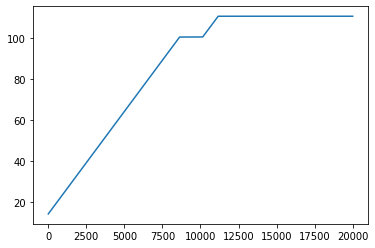

In [29]:
plt.plot(result_payoff)

In [30]:
print(c_layer.plain_payoff())
print(c_layer.option_payoff())
print(len(c_layer.option_payoff()) , len(c_layer.plain_payoff()))
print(c_layer.bsm() /c_layer.spot_price)
print(c_layer.option_payoff()[int(len(result_payoff) / 2)])

[121.69835354 121.68835354 121.67835354 ...   0.           0.
   0.        ]
[121.46347016 121.45347016 121.44347016 ...  -0.23488338  -0.23488338
  -0.23488338]
20000 20000
0.23488338047451474
21.463470160120863


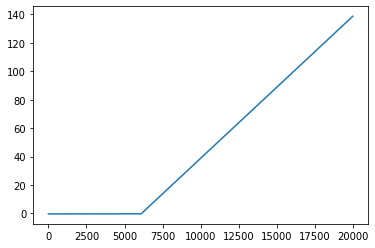